# **Facial Emotion Recogniton**


Facial expressions recognition system has received significant attention among researchers in recent decades mainly because of it is diversified applications, such as human computer interactions, multimedia, surveillance, treatment of mentally retarded patients, and lie detection.

The study of Mehrabian  stated that to understand emotion or intention of a person, 55% of the information are conveyed through facial expressions alone, 38% through vocal cues, and the remaining 7% via verbal cues. 

This encourages the researchers to explore deeply in the area of facial expressions recognition and analysis (FERA). Ekman et al. asserted after extensive study over facial expressions, that facial expressions are universal and innate. 
They also concluded that six basic expressions, namely, happiness, sadness, disgust, anger, surprise, and fear are universal in nature.

## Import open-cv

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import shutil

In [0]:
from google.colab import files
from IPython.display import Image

### **Defining the function picture_crop which takes the argument  name of the picture as string.**


In [0]:
def picture_crop(pic_name):
  
  data=[]
  #desc = LocalBinaryPatterns(24, 8)
  
  #Reading the image img as 3-dimensional metrics
  img=cv2.imread(pic_name,1)
 
  #converting the RGB image into gray-scale image.
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  #enhancing the image by increasing contrast to the objects in the image.
  enhanced=cv2.equalizeHist(gray)
  
  #making the object of cascade classifier to  detecting the facial features from the image.
  face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
  
  #extracting all the coordinates of the faces present in the image.
  faces=face_cascade.detectMultiScale(enhanced , 1.23,5)
  
  #making a rectangle to the detected image
  for x,y,w,h in faces:
    img=cv2.rectangle(enhanced,(x,y),(x+w,y+h),(0,255,0),3)
    
    
    #extracting the face detected face into another 3D metrics.
    subface=img[y:y+h,x:x+w]
    
    #reading the new subface metrics and converting into a new croped image (croped.png)
    cv2.imwrite("croped.png",subface)
    final_img=cv2.imread('croped.png',0)
   
  
  #cv2_imshow(data[0]) 
  return final_img

Testing above function

In [0]:
imgg=picture_crop('Shikhar_Mahajan_.jpg')
cv2_imshow(imgg)

## Import all the zip files and extract it.

Extracting all the 8 claases zip files.

In [0]:
from zipfile import ZipFile

print("Zip file Extracting...  ")

emot_zip=['anger.zip','fear.zip','happiness.zip','sadness.zip','contempt.zip','disgust.zip','surprise.zip','neutral.zip']

for j in range(len(emot_zip)):
  fname=emot_zip[j]
  with ZipFile(fname,'r') as zip:
    zip.extractall()
    
print("done")
  

done


##Labelling the Dataset

In [0]:
#importing opencv and glob libraries
import cv2
from google.colab.patches import cv2_imshow
from glob import glob
import numpy as np

#initializing Numpy arrays
img_pixels=np.zeros((350,48,48))
labels=np.zeros((350,))

i=0
emotions=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
print("Number of classes",len(emotions))

for j in range(len(emotions)):
  
  #Folder wise data labelling
  print("Extracting.. ",emotions[j])
  data_db=emotions[j]
  img_dbb=glob(data_db+'/*.png')
  
  for k in img_dbb:
    
    croped_img=picture_crop(k)
    resized=cv2.resize(croped_img,(48,48))
    img_pixels[i]=resized
    labels[i]=j
    i+=1

print("Total labelled Images  ",i)



Number of classes 8
Extracting  anger_train
Extracting  fear_train
Extracting  happiness_train
Extracting  sadness_train
Extracting  contempt_train
Extracting  disgust_train
Extracting  surprise_train
Extracting  neutral
Total Train Images   350


**Training and Testing data using Sklearn library**

In [0]:
from sklearn.model_selection import train_test_split

train_samples,test_samples,train_labels,test_labels=train_test_split(img_pixels,labels,test_size=0.10,random_state=1)

**Shape of Train samples and Train labels**

In [0]:
print((train_samples.shape))
print((test_samples.shape))
print(train_labels.shape)
print(test_labels.shape)

(315, 48, 48)
(35, 48, 48)
(315,)
(35,)


**Convert Data type as float**

In [0]:
def convert_dtype(x):
    
    x_float = x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)
print(train_samples.shape)
print(test_samples.shape)

(315, 48, 48)
(35, 48, 48)


**Normalizing the data**

In [0]:
def normalize(x):
    
    x_n=x/255
    return x_n
    
train_samples = normalize(train_samples)
test_samples = normalize(test_samples)
print(train_samples.shape)
print(test_samples.shape)

(315, 48, 48)
(35, 48, 48)


**One-hot Encoding of samples**

In [0]:
def oneHot(y, Ny):
    
    from keras.utils import to_categorical
    y_oh=to_categorical(y,Ny)
    return y_oh


train_labels = oneHot(train_labels, 8)
test_labels = oneHot(test_labels, 8)
print(train_labels.shape)
print(test_labels.shape)

(315, 8)
(35, 8)


**Reshaping numpy array of Images.**

In [0]:
def reshape(x):
    
    print(x.shape)
    x_r=x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
    return x_r

train_samples = reshape(train_samples)
print(train_samples.shape)

test_samples = reshape(test_samples)
print(test_samples.shape)

(315, 48, 48)
(315, 48, 48, 1)
(35, 48, 48)
(35, 48, 48, 1)


## Model using convolution theorm

In [0]:
#importing neural network library
import keras
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation
from keras.layers import Dropout


def create_model():
    
    model=Sequential()
    
    #CNN layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.02)))
    model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
    model.add(Dropout(0.2))    
    
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))  
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    #dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model = create_model()

**Model Summary**

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 23, 23, 64)        256       
__________

### Model Fitting

In [0]:
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=15, batch_size=20)

Train on 283 samples, validate on 32 samples
Epoch 1/15
283/283 [==============================] - 3s 10ms/step - loss: 0.6638 - acc: 0.8339 - val_loss: 0.3759 - val_acc: 0.8789
Epoch 2/15
283/283 [==============================] - 0s 678us/step - loss: 0.3626 - acc: 0.8852 - val_loss: 0.3303 - val_acc: 0.9062
Epoch 3/15
283/283 [==============================] - 0s 578us/step - loss: 0.3386 - acc: 0.8953 - val_loss: 0.3173 - val_acc: 0.9062
Epoch 4/15
283/283 [==============================] - 0s 562us/step - loss: 0.2990 - acc: 0.9086 - val_loss: 0.3114 - val_acc: 0.8789
Epoch 5/15
283/283 [==============================] - 0s 562us/step - loss: 0.2731 - acc: 0.9125 - val_loss: 0.3037 - val_acc: 0.8867
Epoch 6/15
283/283 [==============================] - 0s 593us/step - loss: 0.2718 - acc: 0.9112 - val_loss: 0.2864 - val_acc: 0.9023
Epoch 7/15
283/283 [==============================] - 0s 549us/step - loss: 0.2485 - acc: 0.9201 - val_loss: 0.2610 - val_acc: 0.9062
Epoch 8/15
283/283

### Predict Class from Model

In [0]:
y=model.predict(test_samples)
print(y.shape)

(35, 8)


## Confusion metrics

In [0]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(test_labels.argmax(axis=1), y.argmax(axis=1))
#print(cm)
                  

[[ 1  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  2  6  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 2  0  0  0  0  5  0  1]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  4]]


## Loss and Accuracy

In [0]:
loss,acc=model.evaluate(test_samples, test_labels,verbose=0)
print("loss : ",loss)
print("Accuracy : ",acc*100)

0.15566854711089814 0.9464285714285714


# **Real Time Data Using WebCam**

Using javascript frame for accessing web cam

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo34.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename




# Testing on real Time data

**TEST: 1**

<IPython.core.display.Javascript object>

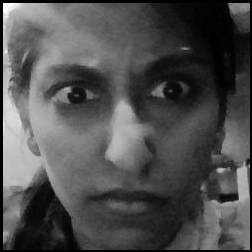

(1, 48, 48)
anger


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo34.png')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g24=yoyo.argmax(axis=1)
print(result[g24[0]])

In [0]:
shutil.move("photo33.png","surprise_train")

'surprise_train/photo33.png'

**TEST : 2**

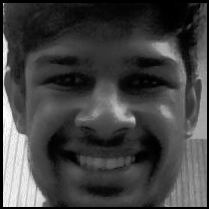

(1, 48, 48)


In [0]:
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g=yoyo.argmax(axis=1)


In [0]:
print(g)
s=g[0]
#print(s)
print(result[s])

[2]
happiness


**TEST : 3**

In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g1=yoyo.argmax(axis=1)


In [0]:
print(g1[0])


6


In [0]:
result[g1[0]]

'surprise'

**TEST : 4**

<IPython.core.display.Javascript object>

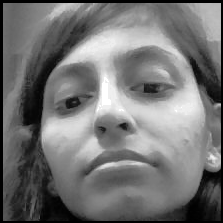

(1, 48, 48)


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g=yoyo.argmax(axis=1)

In [0]:
print(g)

[4]


In [0]:
print(result[g[0]])

contempt


**TEST : 5**

<IPython.core.display.Javascript object>

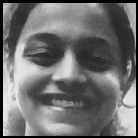

(1, 48, 48)
happiness


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g3=yoyo.argmax(axis=1)
print(result[g3[0]])

**TEST :  6**

<IPython.core.display.Javascript object>

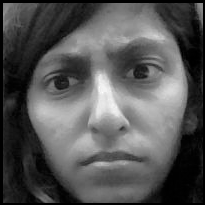

(1, 48, 48)
disgust


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g5=yoyo.argmax(axis=1)
print(result[g5[0]])

**TEST : 7**

<IPython.core.display.Javascript object>

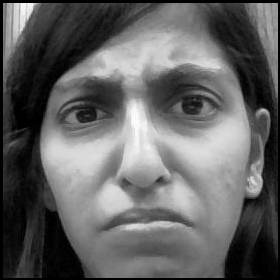

(1, 48, 48)
anger


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g7=yoyo.argmax(axis=1)
print(result[g7[0]])

**TEST : 8**

<IPython.core.display.Javascript object>

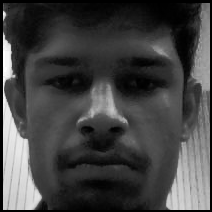

(1, 48, 48)
contempt


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g10=yoyo.argmax(axis=1)
print(result[g10[0]])

**TEST : 9**

<IPython.core.display.Javascript object>

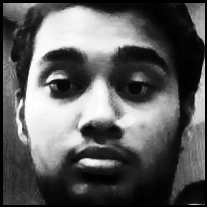

(1, 48, 48)
disgust


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g11=yoyo.argmax(axis=1)
print(result[g11[0]])

**TEST : 10**

<IPython.core.display.Javascript object>

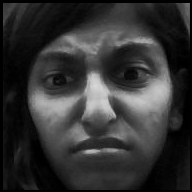

(1, 48, 48)
disgust


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g13=yoyo.argmax(axis=1)
print(result[g13[0]])

**TEST : 11**

<IPython.core.display.Javascript object>

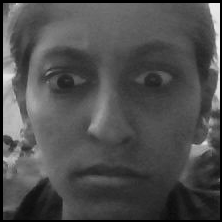

(1, 48, 48)
anger


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g22=yoyo.argmax(axis=1)
print(result[g22[0]])

**TEST : 12**

<IPython.core.display.Javascript object>

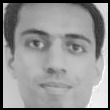

(1, 48, 48)
neutral


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','neutral','disgust','surprise']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g23=yoyo.argmax(axis=1)
print(result[g23[0]])

**TEST : 13**

<IPython.core.display.Javascript object>

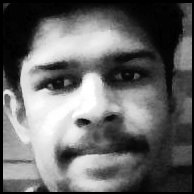

(1, 48, 48)
fear


In [0]:
take_photo()

result=['anger','fear','happiness','sadness','contempt','disgust','surprise','neutral']
web_pic=picture_crop('photo.jpg')

cv2_imshow(web_pic)
res=cv2.resize(web_pic,(48,48))

sample = convert_dtype(res)
sample = normalize(sample)
sample=sample.reshape((1,48,48))

sample = reshape(sample)

yoyo=model.predict(sample)
g21=yoyo.argmax(axis=1)
print(result[g21[0]])

**Backpropagating  wrongly classified image into the correct labelled folder**

---


**Thus making model robust**

Using Shutil library

In [0]:
shutil.move("photo3.png","neutral_train")

'neutral_train'